In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from pathlib import Path
from tg.grammar_ru.corpus import CorpusReader
from retell_utils.corpora_sugar import CorpusSugar

In [2]:
retell_corpus = CorpusReader(Path("./featurized_corpuses/All retell.featurized.retell.corpus.zip"))
text_corpus = CorpusReader(Path("./featurized_corpuses/books.featurized.zip"))
martin_mapping = retell_corpus.read_mapping_data()

In [3]:
corpus_sugar = CorpusSugar(text_corpus,retell_corpus)
books, retell_books, summar_books = corpus_sugar.get_books_retell_info_by_author('Мартин')

In [4]:
from collections import Counter

In [ ]:
ban_words = {'-',',','.','!','—'}
retell_detail = 5
retell = []
for book in books[:1]:
    for chapter in book.index:
        chptr = text_corpus.get_bundles([chapter]).single()
        chapter_id = chptr.src
        morf_sentences = chptr.pymorphy
        sentences_id = np.array(chapter_id['sentence_id'].unique())
        sentences = [chapter_id['word_id'][chapter_id['sentence_id'] == sentence_id] for sentence_id in sentences_id]
        norm_form_sentences = [morf_sentences.loc[sentence]['normal_form'] for sentence in sentences]
        break
        sentence_score = []
        for i,first_sentence in enumerate(norm_form_sentences):
            coef = 0
            for second_sentence in norm_form_sentences[i+1:]:
                words_1 = set(first_sentence) - ban_words
                words_2 = Counter(second_sentence)
                coef+= sum(words_2[word] for word in words_1) / (len(first_sentence)+ len(second_sentence))
            sentence_score.append(coef)
        sentence_score = np.array(sentence_score)
        sorted_index_array = np.argsort(sentence_score)[::-1]
        sorted_array = sentence_score[sorted_index_array]
        retell_ids = sentences_id[sorted_index_array[:retell_detail]]
        retell.append("\n".join(" ".join(chapter_id['word'][chapter_id['sentence_id']== sentence_id].values) for sentence_id in retell_ids))

In [21]:
true_retell = []
for book in retell_books[1:2]:
    for chapter in book.index:
        chptr = retell_corpus.get_bundles([chapter]).single().src
        sentences_id = np.array(chptr['sentence_id'].unique())
        sentences = [chptr['word'][chptr['sentence_id'] == sentence_id] for sentence_id in sentences_id]
        true_retell.append("\n".join(" ".join(sentence.values) for sentence in sentences[:5]))

In [36]:
true_summ = []
for book in summar_books[1:2]:
    for chapter in book.index:
        chptr = retell_corpus.get_bundles([chapter]).single().src
        sentences_id = np.array(chptr['sentence_id'].unique())
        sentences = [chptr['word'][chptr['sentence_id'] == sentence_id] for sentence_id in sentences_id]
        true_summ.append("\n".join(" ".join(sentence.values) for sentence in sentences[:1]))

In [7]:
for ch in retell:
    print(ch,end='\n\n')

— И если он говорит , что они мертвы , мне других доказательств не нужно .
Уилл успел достаточно долго проездить с рыцарем и знал — лучше не докучать ему в подобном настроении .
Лорденыш как будто и не слышал его .
Уилл знал , что его рано или поздно вовлекут в разговор , и хотел , чтобы это случилось по возможности позже .
Весь день Уиллу казалось , что за ним следит нечто холодное и непреклонное , совершенно не испытывающее к нему симпатии .

Робб и Джон , высокие и спокойные , сидели на конях , между ними красовался Бран на своем пони и пытался казаться старше семи лет , старательно изображая , что все это он уже видел .
Он обхватил меч обеими руками и проговорил :
Шел девятый год лета — и седьмой в жизни Брана .
Бран удержал пони на месте и не отвернулся .
Мог бы и посмотреть ему в глаза , Старк .

Ее боги имели имена , и лики их были знакомы ей , как лица родителей .
Он угрюмо посмотрел на нее и спросил голосом далеким и официальным :
Кейтилин была помазана семью елеями , она полу

In [8]:
for ch in true_retell:
    print(ch,end='\n\n')

Гаред , Уилл и Уэймар Ройс , три разведчика из Ночного Дозора , преследуют банду налётчиков-одичалых в Зачарованном Лесу .
Уилл докладывает о нахождении этих одичалых , заявляя , что они все мертвы .
Гаред , старый человек , служивший в Дозоре десятилетия , встревожен , и настаивает на возвращении в Чёрный Замок - им необходимо преодолеть восемь-девять дней пути , и если пойдет снег , дни станут неделями .
Однако их лидером является восемнадцатилетний дворянин Уэймар , который поднимает старика на смех и начинает расспрашивать Уилла о деталях увиденного .
Уилл поясняет , что нашел лагерь одичалых .

Лорд Эддард Старк с двадцатью своими людьми , среди которых его сыновья Робб и Бран , бастард Джон Сноу и воспитанник Теон Грейджой , выезжает в удалённый острог в нескольких часах езды от Винтерфелла , чтобы свершить правосудие над дезертиром из Ночного Дозора — Гаредом .
Лорд Старк приговаривает дезертира к смерти и лично отрубает ему голову своим валирийским мечом по имени Лёд , а сыновь

In [26]:
from retell_utils.metrics import jaccard_text,get_cosine_sim

In [23]:
def bar_jac_cos_metric(jac,cos):
    fig, axis = plt.subplots(2,1)
    axis[0].bar(range(len(jac)),jac)
    axis[0].set_title('Индекс Жаккара')
    axis[1].bar(range(len(cos)),cos)
    axis[1].set_title('Косинусное расстояние')
    plt.subplots_adjust(left=0,right=1, wspace=0, hspace=0.5)

In [27]:
jaccard_sim = np.array([jaccard_text(retell[i],true_retell[i]) for i in range(len(true_retell))])

In [28]:
cos_sim = np.array([get_cosine_sim(retell[i],true_retell[i]) for i in range(len(true_retell))])

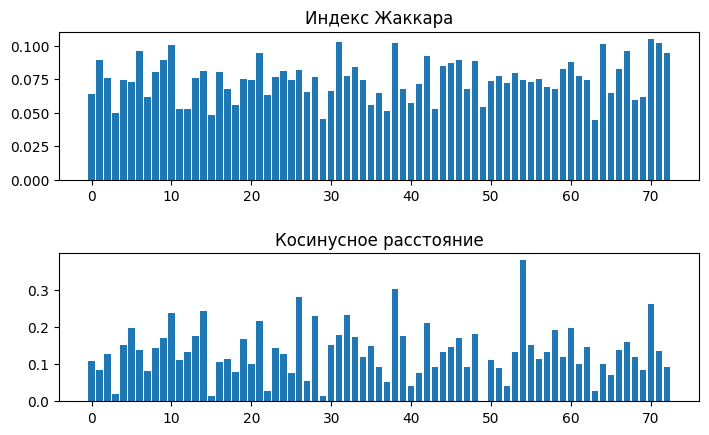

In [31]:
bar_jac_cos_metric(jaccard_sim,cos_sim)

In [29]:
np.sort(cos_sim)[::-1][:5]

array([0.38007571, 0.30326642, 0.28160661, 0.26127488, 0.24242869])

In [30]:
np.sort(jaccard_sim)[::-1][:5]

array([0.10526316, 0.1025641 , 0.1023622 , 0.10185185, 0.1011236 ])

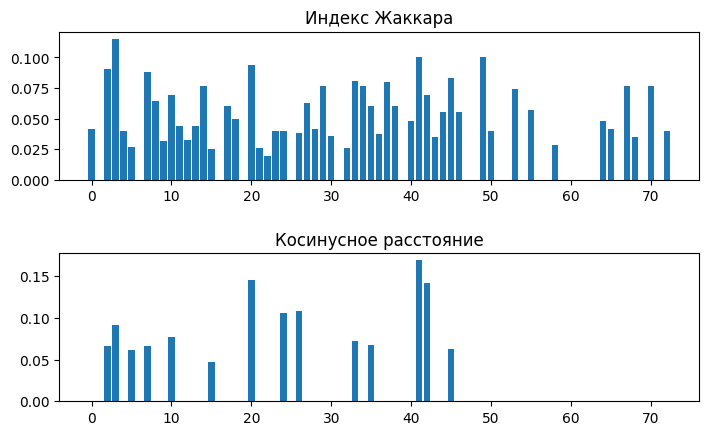

In [37]:
summar_jaccard_sim = np.array([jaccard_text(retell[i].split('.')[0],true_summ[i]) for i in range(len(true_summ))])
summar_cos_sim = np.array([get_cosine_sim(retell[i].split('.')[0],true_summ[i]) for i in range(len(true_summ))])
bar_jac_cos_metric(summar_jaccard_sim,summar_cos_sim)

In [32]:
def display_arg_max_min_text(retell_,true_text,sim_metric):
    argmax = sim_metric.argmax()
    argmin = sim_metric.argmin()
    display("Текст с наибольшим значением метрики")
    display(retell_[argmax])
    display(true_text[argmax])
    display("Текст с наименьшим значением метрики")
    display(retell_[argmin])
    display(true_text[argmin])

In [33]:
display("Коэфициент Жаккара")
display_arg_max_min_text(retell,true_retell,jaccard_sim)

'Коэфициент Жаккара'

'Текст с наибольшим значением метрики'

'Тогда-то он и сказал мне , что собирается сесть на трон .\nНо как ему быть ?\nВсе , что от него требуется — это довериться отцу , встать на свои короткие ноги и заявить : « Да , я это сделал .\nОн сказал , что если я не буду ему угождать , он отдаст меня им , вот я и угождала .\nОна положит конец его браку и всем его надеждам на Бобровый Утес , но и от того , и от другого ему немного было пользы .'

'Джон Сноу пробирается в конюшню , намереваясь отправиться на юг , чтобы присоединиться к Роббу .\nУзнавший об этом Сэмвел Тарли пробует его остановить , но Джон направляет кобылу прямо на него , в надежде , что Тарли успеет убраться в сторону .\nСэм этого не ожидает и падает , а Джон посылает кобылу вперед и надеется , что Сэм не побежит немедленно звать дозорных , а дождется , чтобы все само собой открылось утром ;\nДжону стыдно , что он предает доверие Лорда-командующего Дозором , и ему хватило чести оставить валирийский Длинный Коготь .\nОтъехав достаточно далеко , чтобы Черный замок скрылся из виду , Джон обдумывает свои дальнейшие действия — куда ехать , где сменить черную одежду — и вспоминает Винтерфелл .'

'Текст с наименьшим значением метрики'

'Он с ними , но к ним не принадлежит , подумал Давос .\nСтупай с лордом Давосом и слушайся его .\nДавос смотрел на него из окна верхней галереи .\nХотел бы Давос знать , что он там видит .\nСо мной вы или нет ?'

'Кейтилин Старк в окружении тридцати латников охраны ожидает окончания битвы между войском её старшего сына и силами Джейме Ланнистера .\nПред её глазами проносится череда воспоминаний об отце , Брандоне Старке , муже Неде , которые просили её ждать , и она раз за разом терпеливо ждала своих мужчин , надеясь на их скорое и доброе возвращение .\nА теперь настала очередь её старшего сына .\nХотя Молодой Волк отправился в бой в сопровождении тридцати человек охраны , у Кейтилин сжимается сердце при мысли о нём .\nВслушиваясь в звуки сражения , она волнуется и за сына , и за всех этих людей , умчавшихся в бой чтобы убивать или быть убитыми .'

In [34]:
display("Косинусное расстояние")
display_arg_max_min_text(retell,true_retell,cos_sim)

'Косинусное расстояние'

'Текст с наибольшим значением метрики'

'— Ты уверен ? — только и спросил он .\n— Отдайте мальчика мне , и вы больше никогда не услышите его имени , — пообещала Мелисандра .\nОн клялся потом , что не хотел позорить меня , что был пьян и не знал , чья это спальня .\nДокажет ли это могущество Владыки и его волю ?\nМогло показаться , что король не расслышал то , что ему сообщили .'

'Кхал Дрого заявил Дени , что его сыну не нужно железное кресло .\nНа ее возражения о том , что по предсказанию он должен доскакать до края земли , он ответил , что земля кончается у черного соленого моря , и больше ничего не желал слушать .\nЗатем Дрого уехал охотиться на белого льва .\nДейнерис стала просить Джораха Мормонта помочь ей убедить мужа в необходимости завоевания Вестероса .\nРыцарь ответил , что ей необходимо запастись терпением , потому что дотракийцы совершают поступки , когда приходит время , руководствуясь собственными причинами .'

'Текст с наименьшим значением метрики'

'В середине его стоит Водная башня , и река проносится прямо под ней .\nЛорд Уолдер и его мост были очень ему нужны тогда , а теперь стали еще нужнее .\n— Я знаю Фреев , матушка , знаю , как дурно поступил с ними и как в них нуждаюсь .\nЛорд Уолдер обыкновенно передвигается в крытых носилках , и дождь ему не помеха .\nЯ не могу ввести его в чертоги лорда Уолдера .'

'Нед завтракает с дочерьми и септой Мордейн в покоях Десницы .\nАрья просит отпустить её на последний урок с Сирио .\nОтец даёт разрешение , что тут же вызывает негодование Сансы , которой запретили видеться с принцем Джоффри .\nНед пытается успокоить старшую дочь , но та в слезах покидает покои .\nВслед уходят септа Мордейн и Арья .'